In [65]:
import os
import re
import string
import matplotlib.pyplot as plt
import nltk
import numpy as np
from nltk.corpus import gutenberg

In [32]:
def normalize_text(text):
    text = text.lower()
    text = re.sub('['+string.punctuation+']', ' ', text)
    text = re.sub('[0-9]','',text)
    return text

In [33]:
def generate_vocabs(dir_name):
    vocabs = []
    for filename in os.listdir(dir_name):
        print("Reading file:",filename)
        name = dir_name + filename
        with open(name,encoding='utf8') as f:
            text = f.read()
            text = normalize_text(text)
            text = list(set(text.split()))
            vocabs.append(text)
    return vocabs

In [34]:
def get_counts(dir_name):
    counts = []
    N = []
    for filename in os.listdir(dir_name):
        name = dir_name + filename
        dict_ = {}
        with open(name,encoding='utf8') as f:
            text = f.read()
            text = normalize_text(text)
            text = text.split()
            for word in text:
                if word not in dict_.keys():
                    dict_[word] = 1
                else:
                    dict_[word] += 1
            N.append(len(text))
        counts.append(dict_)
    return counts, N

In [35]:
train_vocabs = generate_vocabs('Materials/train/')
print(len(train_vocabs))

Reading file: train1.txt
Reading file: train2.txt
Reading file: train3.txt
Reading file: train4.txt
Reading file: train5.txt
5


In [36]:
test_vocabs = generate_vocabs('Materials/test/')

Reading file: test.txt


In [37]:
test_counts, N = get_counts('Materials/test/')

In [29]:
def get_oov_rates(train_dir, test_dir):
    oov_rates = []
    train_vocabs = generate_vocabs(train_dir)
    test_vocabs = generate_vocabs(test_dir)
    test_counts, N = get_counts(test_dir)
    for i in range(len(test_vocabs)):
        oov_rate = []
        #N = len(test_vocab)
        n = N[i]
        for train_vocab in train_vocabs:
            count_oov = 0
            oov_words = []
            dict_oc = {}
            for test_token in test_vocabs[i]:
                if test_token not in train_vocab:
                    count_oov += test_counts[i][test_token]
                    dict_oc[test_token] = test_counts[i][test_token]
                    oov_words.append(test_token)
            rate = count_oov / n
            oov_rate.append(rate)
#             sorted_d = sorted( ((v,k) for k,v in dict_oc.items()), reverse=True)
#             print("Count:",count_oov)
#             print(sorted_d[:40])
#             print("\n\n")
        oov_rates.append(oov_rate)
    return oov_rates

In [30]:
def get_vocab_lengths(vocabs):
    count = []
    for vocab in vocabs:
        count.append(len(vocab))
    return count

In [31]:
oov_rates = get_oov_rates('Materials/train/','Materials/test/')
train_vocab_lengths = get_vocab_lengths(train_vocabs)
print(train_vocab_lengths)
print(oov_rates)

Reading file: train1.txt
Reading file: train2.txt
Reading file: train3.txt
Reading file: train4.txt
Reading file: train5.txt
Reading file: test.txt
[301, 424, 655, 1758, 3151]
[[0.5595108963613056, 0.5745652959931631, 0.4407191927160372, 0.29849127304999507, 0.2055024159353121]]


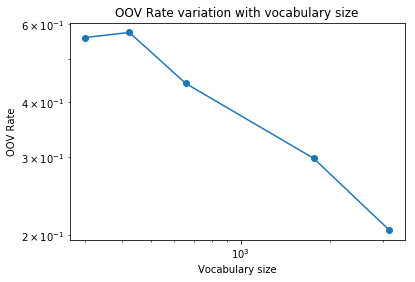

In [105]:
y_s = oov_rates[0]
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Vocabulary size')
plt.ylabel('OOV Rate')
plt.title('OOV Rate variation with vocabulary size')
plt.plot(train_vocab_lengths,y_s,'-o')
plt.show()

$Explanation$ $of$ $the$ $plot$.
<p>We see that the plot above more or less follows the standard power law distribution for OOV rate, and the vocabulary size. But we see a slight deviation for vocabulary of the second text. This can somewhat be attributed to the fact that the second text context is actually very different from the other training texts, and the test text. The second training file is based on geo-politics, whereas the other files are all primarily scientific topics. Hence, we can say due to this we see a higher OOV rate for the second text than the first one, even though we increase the vocabulary size.</p>

$How$ $do$ $Out-Of-Vocabulary$ $words$ $affect$ $tasks$ $like$ $computing$ $probability$ $for$ $a$ $bigram$ $i.e.$ $P(w0|w−1)?$ $Explain$ $a$ $possible$ $remedy$. <br><br>
 This is what we call an open vocabulary problem. So our vocabulary is unbounded, and we may encounter unknown words later. An open vocabulary system is one in which we model these potential unknown words in the test set by adding a
pseudo-word called `<UNK>`.<br>
There  are  two  common  ways  to  train  the  probabilities  of  the  unknown  word model `<UNK>`. The first one is to turn the problem back into a closed vocabulary one by choosing a fixed vocabulary in advance:

1. Choose a vocabulary (word list) that is fixed in advance.
2. Convert in the training set any word that is not in this set (any OOV word) to the unknown word token `<UNK>` in a text normalization step.
3. Estimate the probabilities for `<UNK>` from its counts just like any other regular word in the training set. 

The second alternative, in situations where we don’t have a prior vocabulary in advance, is to create such a vocabulary implicitly, replacing words in the training data by `<UNK>` based on their frequency. For example we can replace by `<UNK>` all words that occur fewer than $n$ times in the training set, where $n$ is some small number, or equivalently select a vocabulary size $V$ in advance (say 50,000) and choose the top $V$ words by frequency and replace the rest by `<UNK>`. In either case we then proceed to train the language model as before, treating `<UNK>` like a regular word.

## Exercise 3

In [118]:
fileid = 'carroll-alice.txt'
alice = gutenberg.raw(fileid)
alice = alice.lower()

list1 = ["you're","your","you'll","you've","you'd","yours","youself","yourself"]
#list1 = ["you'll","you've","your"]
for w in list1:
    alice = alice.replace(w,"you")
alice = re.sub('['+string.punctuation+']', '', alice)
alice = re.sub('[0-9]','',alice)
#print(alice)

In [119]:
with open("alice.txt",'w') as f:
    f.write(alice)

In [120]:
alice_list = alice.split()
len(alice_list)

26382

In [121]:
indices = [i for i, x in enumerate(alice_list) if x == "you"]
print(len(indices))

477


In [142]:
c_you = len(indices)
N = len(alice_list)
p_you = len(indices) / len(alice_list)
#print("Pw:",p_you)
corrs = []
for d in range(1,51):
    count = 0
    for i in indices:
        if (i+d) in indices:
            count += 1
            #if d >= 2 and d <=4:
                #print("d:",d,"text:",alice_list[i:i+d+1])
    p_d = count / N
    corr = p_d / (p_you**2)
    corrs.append(corr)

In [143]:
#print(corrs)

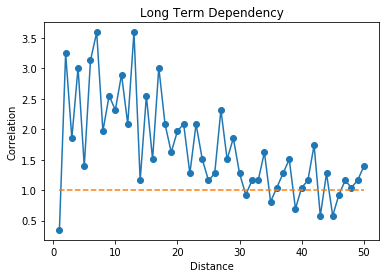

In [145]:
plt.xlabel('Distance')
plt.ylabel('Correlation')
#plt.xscale('log')
plt.title('Long Term Dependency')
plt.grid()
plt.plot(range(1,51),corrs,'o-')
plt.plot(range(1,51),np.ones(len(corrs)),'--')
#plt.plot(range(len(c2)),c1)
plt.show()

In [107]:
from math import log2
h1 = -(((10/40)*log2(10/40))+((30/40)*log2(30/40)))
h2 = -(((9/39)*log2(9/39))+((30/39)*log2(30/39)))
h1 - h2

0.03192828716704765

In [109]:
(1/4)*log2(2/3) + (1/2) * log2(4/3) + (1/4)

0.3112781244591328